# PROCESSING

# Q1

## (a) Data Structure

In [1]:
!hdfs dfs -ls -R /data/ghcnd/

drwxr-xr-x   - jsw93 supergroup          0 2022-08-08 01:20 /data/ghcnd/daily
-rw-r--r--   8 jsw93 supergroup       3358 2021-08-09 15:08 /data/ghcnd/daily/1763.csv.gz
-rw-r--r--   8 jsw93 supergroup       3327 2021-08-09 15:03 /data/ghcnd/daily/1764.csv.gz
-rw-r--r--   8 jsw93 supergroup       3335 2021-08-09 15:03 /data/ghcnd/daily/1765.csv.gz
-rw-r--r--   8 jsw93 supergroup       3344 2021-08-09 14:56 /data/ghcnd/daily/1766.csv.gz
-rw-r--r--   8 jsw93 supergroup       3356 2021-08-09 15:06 /data/ghcnd/daily/1767.csv.gz
-rw-r--r--   8 jsw93 supergroup       3325 2021-08-09 15:02 /data/ghcnd/daily/1768.csv.gz
-rw-r--r--   8 jsw93 supergroup       3418 2021-08-09 15:03 /data/ghcnd/daily/1769.csv.gz
-rw-r--r--   8 jsw93 supergroup       3357 2021-08-09 15:07 /data/ghcnd/daily/1770.csv.gz
-rw-r--r--   8 jsw93 supergroup       3373 2021-08-09 15:06 /data/ghcnd/daily/1771.csv.gz
-rw-r--r--   8 jsw93 supergroup       3419 2021-08-09 15:05 /data/ghcnd/daily/1772.csv.gz
-rw-r--r--   8 jsw93 s

-rw-r--r--   8 jsw93 supergroup     141287 2021-08-09 14:56 /data/ghcnd/daily/1863.csv.gz
-rw-r--r--   8 jsw93 supergroup     139789 2021-08-09 15:03 /data/ghcnd/daily/1864.csv.gz
-rw-r--r--   8 jsw93 supergroup     145257 2021-08-09 15:07 /data/ghcnd/daily/1865.csv.gz
-rw-r--r--   8 jsw93 supergroup     188459 2021-08-09 14:58 /data/ghcnd/daily/1866.csv.gz
-rw-r--r--   8 jsw93 supergroup     237921 2021-08-09 15:03 /data/ghcnd/daily/1867.csv.gz
-rw-r--r--   8 jsw93 supergroup     257506 2021-08-09 15:01 /data/ghcnd/daily/1868.csv.gz
-rw-r--r--   8 jsw93 supergroup     305230 2021-08-09 15:03 /data/ghcnd/daily/1869.csv.gz
-rw-r--r--   8 jsw93 supergroup     355084 2021-08-09 14:58 /data/ghcnd/daily/1870.csv.gz
-rw-r--r--   8 jsw93 supergroup     478357 2021-08-09 15:02 /data/ghcnd/daily/1871.csv.gz
-rw-r--r--   8 jsw93 supergroup     652507 2021-08-09 14:59 /data/ghcnd/daily/1872.csv.gz
-rw-r--r--   8 jsw93 supergroup     734687 2021-08-09 14:56 /data/ghcnd/daily/1873.csv.gz
-rw-r--r--

### Directory Tree

Data structure has been listed in the directory tree below, due to the great number of files in daily directory. I only included parts of the files under “daily” node where there are more files up to 2022 in actual. 

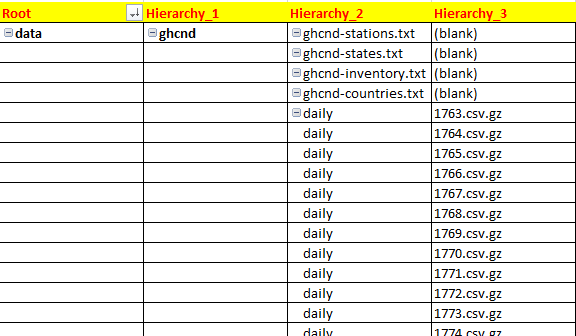

## (b) Data Size Trend - daily

In Daily, it contains the data of 260 years between Year 1763 and Year 2022. 
As shown in the below line chart, the size of data is increasing in generally. Firstly, with the development of climatology, scientists are exploring the climate in more and more different angles. Secondly, there are much more equipment and facilities to measure these numbers with technical development. 


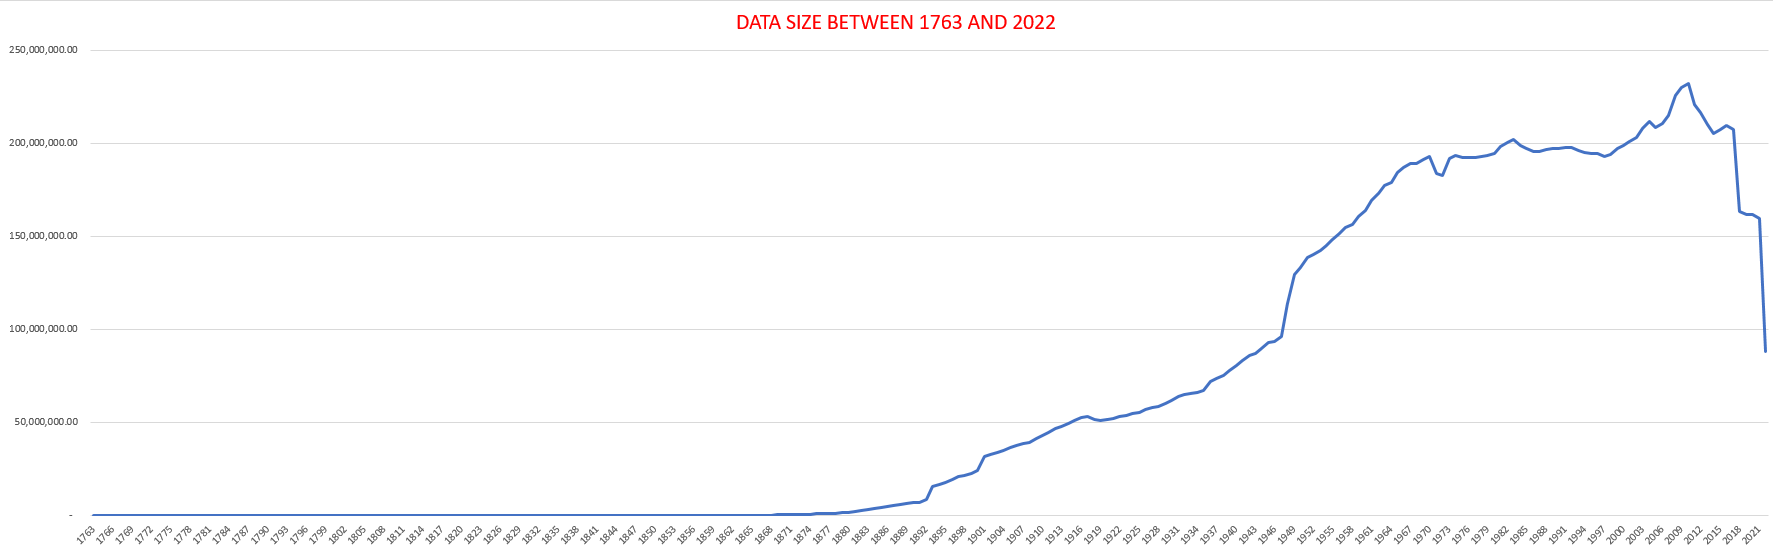

## (c) Data Size

The total size of all the data in ghcbnd is roughly 15.8 GB. 

In [2]:
!hdfs dfs -du -h /data/

279.9 M  2.2 G    /data/crime
143.8 M  1.1 G    /data/fraud
15.8 G   126.5 G  /data/ghcnd
1.9 K    7.5 K    /data/helloworld
1.2 G    9.4 G    /data/ml
12.9 G   103.5 G  /data/msd
3.7 M    29.3 M   /data/openflights
19.1 M   152.9 M  /data/shakespeare
0        0        /data/temp


“daily” is 15.8 GB. 

In [3]:
!hdfs dfs -du -h /data/ghcnd/

15.8 G  126.1 G  /data/ghcnd/daily
3.6 K   28.6 K   /data/ghcnd/ghcnd-countries.txt
31.8 M  254.7 M  /data/ghcnd/ghcnd-inventory.txt
1.1 K   8.5 K    /data/ghcnd/ghcnd-states.txt
10.0 M  80.1 M   /data/ghcnd/ghcnd-stations.txt


# Q2

In [132]:
# Run this cell to import pyspark and to define start_spark() and stop_spark()

import findspark

findspark.init()

import getpass
import pandas as pd
import pyspark
import random
import re

from IPython.display import display, HTML
from pyspark import SparkContext
from pyspark.sql import SparkSession


# Functions used below

def username():
    """Get username with any domain information removed.
    """

    return re.sub('@.*', '', getpass.getuser())


def dict_to_html(d):
    """Convert a Python dictionary into a two column table for display.
    """

    html = []

    html.append(f'<table width="100%" style="width:100%; font-family: monospace;">')
    for k, v in d.items():
        html.append(f'<tr><td style="text-align:left;">{k}</td><td>{v}</td></tr>')
    html.append(f'</table>')

    return ''.join(html)


def show_as_html(df, n=20):
    """Leverage existing pandas jupyter integration to show a spark dataframe as html.
    
    Args:
        n (int): number of rows to show (default: 20)
    """

    display(df.limit(n).toPandas())

    
def display_spark():
    """Display the status of the active Spark session if one is currently running.
    """
    
    if 'spark' in globals() and 'sc' in globals():

        name = sc.getConf().get("spark.app.name")
        
        html = [
            f'<p><b>Spark</b></p>',
            f'<p>The spark session is <b><span style="color:green">active</span></b>, look for <code>{name}</code> under the running applications section in the Spark UI.</p>',
            f'<ul>',
            f'<li><a href="http://mathmadslinux2p.canterbury.ac.nz:8080/" target="_blank">Spark UI</a></li>',
            f'<li><a href="{sc.uiWebUrl}" target="_blank">Spark Application UI</a></li>',
            f'</ul>',
            f'<p><b>Config</b></p>',
            dict_to_html(dict(sc.getConf().getAll())),
            f'<p><b>Notes</b></p>',
            f'<ul>',
            f'<li>The spark session <code>spark</code> and spark context <code>sc</code> global variables have been defined by <code>start_spark()</code>.</li>',
            f'<li>Please run <code>stop_spark()</code> before closing the notebook or restarting the kernel or kill <code>{name}</code> by hand using the link in the Spark UI.</li>',
            f'</ul>',
        ]
        display(HTML(''.join(html)))
        
    else:
        
        html = [
            f'<p><b>Spark</b></p>',
            f'<p>The spark session is <b><span style="color:red">stopped</span></b>, confirm that <code>{username() + " (jupyter)"}</code> is under the completed applications section in the Spark UI.</p>',
            f'<ul>',
            f'<li><a href="http://mathmadslinux2p.canterbury.ac.nz:8080/" target="_blank">Spark UI</a></li>',
            f'</ul>',
        ]
        display(HTML(''.join(html)))


# Functions to start and stop spark

def start_spark(executor_instances=2, executor_cores=1, worker_memory=1, master_memory=1):
    """Start a new Spark session and define globals for SparkSession (spark) and SparkContext (sc).
    
    Args:
        executor_instances (int): number of executors (default: 2)
        executor_cores (int): number of cores per executor (default: 1)
        worker_memory (float): worker memory (default: 1)
        master_memory (float): master memory (default: 1)
    """

    global spark
    global sc

    user = username()
    
    cores = executor_instances * executor_cores
    partitions = cores * 4
    port = 4000 + random.randint(1, 999)

    spark = (
        SparkSession.builder
        .master("spark://masternode2:7077")
        .config("spark.driver.extraJavaOptions", f"-Dderby.system.home=/tmp/{user}/spark/")
        .config("spark.dynamicAllocation.enabled", "false")
        .config("spark.executor.instances", str(executor_instances))
        .config("spark.executor.cores", str(executor_cores))
        .config("spark.cores.max", str(cores))
        .config("spark.executor.memory", f"{worker_memory}g")
        .config("spark.driver.memory", f"{master_memory}g")
        .config("spark.driver.maxResultSize", "0")
        .config("spark.sql.shuffle.partitions", str(partitions))
        .config("spark.ui.port", str(port))
        .appName(user + " (jupyter)")
        .getOrCreate()
    )
    sc = SparkContext.getOrCreate()
    
    display_spark()

    
def stop_spark():
    """Stop the active Spark session and delete globals for SparkSession (spark) and SparkContext (sc).
    """

    global spark
    global sc

    if 'spark' in globals() and 'sc' in globals():

        spark.stop()

        del spark
        del sc

    display_spark()


# Make css changes to improve spark output readability

html = [
    '<style>',
    'pre { white-space: pre !important; }',
    'table.dataframe td { white-space: nowrap !important; }',
    'table.dataframe thead th:first-child, table.dataframe tbody th { display: none; }',
    '</style>',
]
display(HTML(''.join(html)))


# Print function docstrings

help(start_spark)
help(stop_spark)
help(display_spark)
help(show_as_html)

Help on function start_spark in module __main__:

start_spark(executor_instances=2, executor_cores=1, worker_memory=1, master_memory=1)
    Start a new Spark session and define globals for SparkSession (spark) and SparkContext (sc).
    
    Args:
        executor_instances (int): number of executors (default: 2)
        executor_cores (int): number of cores per executor (default: 1)
        worker_memory (float): worker memory (default: 1)
        master_memory (float): master memory (default: 1)

Help on function stop_spark in module __main__:

stop_spark()
    Stop the active Spark session and delete globals for SparkSession (spark) and SparkContext (sc).

Help on function display_spark in module __main__:

display_spark()
    Display the status of the active Spark session if one is currently running.

Help on function show_as_html in module __main__:

show_as_html(df, n=20)
    Leverage existing pandas jupyter integration to show a spark dataframe as html.
    
    Args:
        n 

In [133]:
# Run this cell to start a spark session in this notebook

start_spark(executor_instances=2, executor_cores=1, worker_memory=1, master_memory=1)

spark.dynamicAllocation.enabled,false
spark.app.id,app-20220916150703-0864
spark.driver.extraJavaOptions,-Dderby.system.home=/tmp/zge11/spark/
spark.master,spark://masternode2:7077
spark.driver.port,36747
spark.executor.id,driver
spark.sql.warehouse.dir,file:/users/home/zge11/spark-warehouse
spark.driver.memory,1g
spark.driver.host,mathmadslinux2p.canterbury.ac.nz
spark.ui.port,4096
spark.app.name,zge11 (jupyter)


In [134]:
# Write your imports and code here or insert cells below

from pyspark.sql import Row, DataFrame, Window, functions as F
from pyspark.sql.types import *

## (a) schema for "daily"

In [7]:
# Load daily_data
schema_daily = StructType([
    StructField("ID ", StringType(), True),
    StructField("DATE",StringType(), True),
    StructField("ELEMENT", StringType(), True),
    StructField("VALUE", FloatType(), True),
    StructField("MEASUREMENT FLAG", StringType(), True),
    StructField("QUALITY FLAG", StringType(), True),
    StructField("SOURCE FLAG", StringType(), True),
    StructField("OBSERVATION", StringType(), True),
])

## (b) Load data for 2022.csv.gz (1,000 rows)

In [8]:
year = "2022"

daily_data_path_yearly = f"hdfs:///data/ghcnd/daily/{year}.csv.gz"

daily_data = (
    spark.read.format("com.databricks.spark.csv")
    .option("header", "false")
    .option("inferSchema", "false")
    .schema(schema_daily)
    .load(daily_data_path_yearly)
).limit(1000)

In [9]:
daily_data.show()

+-----------+--------+-------+-----+----------------+------------+-----------+-----------+
|        ID |    DATE|ELEMENT|VALUE|MEASUREMENT FLAG|QUALITY FLAG|SOURCE FLAG|OBSERVATION|
+-----------+--------+-------+-----+----------------+------------+-----------+-----------+
|AE000041196|20220101|   TAVG|204.0|               H|        null|          S|       null|
|AEM00041194|20220101|   TAVG|211.0|               H|        null|          S|       null|
|AEM00041217|20220101|   TAVG|209.0|               H|        null|          S|       null|
|AEM00041218|20220101|   TAVG|207.0|               H|        null|          S|       null|
|AG000060390|20220101|   TAVG|121.0|               H|        null|          S|       null|
|AG000060590|20220101|   TAVG|151.0|               H|        null|          S|       null|
|AG000060611|20220101|   TAVG|111.0|               H|        null|          S|       null|
|AGE00147708|20220101|   TMIN| 73.0|            null|        null|          S|       null|

### Description not as expected:

1. for Date column, it cannot be loaded as date type. It is currently string type.
2. for observation column, it cannot be loaded as timestamp type. It is currently string type, too.

## (c) Loading each stations, states, counties and inventory

In [10]:
common_path = f"hdfs:///data/ghcnd/ghcnd-"

#### Load stations_data

In [11]:
# Load stations_data
stations = spark.read.text(common_path + "stations.txt")
stations = stations.select(
    stations.value.substr(1,11).alias("station_id"),
    stations.value.substr(13,8).cast("double").alias("station_latitude"),
    stations.value.substr(22,9).cast("double").alias("station_longitude"),
    stations.value.substr(32,6).cast("double").alias("station_elevation"),
    stations.value.substr(39,2).alias("station_state"),
    stations.value.substr(42,30).alias("station_name"),
    stations.value.substr(73,3).alias("station_gsn_flag"),
    stations.value.substr(77,3).alias("station_hcn/crn_flag"),
    stations.value.substr(81,5).alias("station_wmo_id")
)
show_as_html(stations.limit(3))

,station_id,station_latitude,station_longitude,station_elevation,station_state,station_name,station_gsn_flag,station_hcn/crn_flag,station_wmo_id
0,ACW00011604,17.1167,-61.7833,10.1,,ST JOHNS COOLIDGE FLD,,,
1,ACW00011647,17.1333,-61.7833,19.2,,ST JOHNS,,,
2,AE000041196,25.3330,55.5170,34.0,,SHARJAH INTER. AIRP,GSN,,41196


#### Load state_data

In [12]:
# Load states_data
states = spark.read.text(common_path + "states.txt")
states = states.select(
    states.value.substr(1,2).alias("states_code"),
    states.value.substr(4,47).alias("states_name"),
)
show_as_html(states.limit(3))

,states_code,states_name
0,AB,ALBERTA
1,AK,ALASKA
2,AL,ALABAMA


#### Load countries_data

In [13]:
# Load countries_data
countries = spark.read.text(common_path + "countries.txt")
countries = countries.select(
    countries.value.substr(1,2).alias("country_code"),
    countries.value.substr(4,61).alias("country_name"),
)
show_as_html(countries.limit(3))

,country_code,country_name
0,AC,Antigua and Barbuda
1,AE,United Arab Emirates
2,AF,Afghanistan


#### Load Inventory_data

In [14]:
# Load inventory_data
inventory = spark.read.text(common_path + "inventory.txt")
inventory = inventory.select(
    inventory.value.substr(1,11).alias("inventory_code"),
    inventory.value.substr(13,8).cast("double").alias("inventory_latitude"),
    inventory.value.substr(22,9).cast("double").alias("inventory_longitude"),
    inventory.value.substr(32,4).alias("inventory_element"),
    inventory.value.substr(37,4).cast("integer").alias("inventory_firstyear"),
    inventory.value.substr(42,4).cast("integer").alias("inventory_lastyear"),
)
show_as_html(inventory.limit(3))

,inventory_code,inventory_latitude,inventory_longitude,inventory_element,inventory_firstyear,inventory_lastyear
0,ACW00011604,17.1167,-61.7833,TMAX,1949,1949
1,ACW00011604,17.1167,-61.7833,TMIN,1949,1949
2,ACW00011604,17.1167,-61.7833,PRCP,1949,1949


#### count_rows for each metadata table

In [15]:
#count_rows:
stations_rows = stations.count()
print("There are " + str(stations_rows) + " rows in the metadata of stations.")
states_rows = states.count()
print("There are " + str(states_rows) + " rows in the metadata of states.")
countries_rows = countries.count()
print("There are " + str(countries_rows) + " rows in the metadata of countries.")
inventory_rows = inventory.count()
print("There are " + str(inventory_rows) + " rows in the metadata of inventory.")

There are 122047 rows in the metadata of stations.
There are 74 rows in the metadata of states.
There are 219 rows in the metadata of countries.
There are 725754 rows in the metadata of inventory.


#### count_rows for stations without WOM_ID

In [16]:
stations_without_WOMid = stations.select(
    F.col("station_id")
).where(
    F.col("station_wmo_id") == "     "
)

print(stations_without_WOMid.count())

113953


# Q3

### create an output directory

In [17]:
!hdfs dfs -mkdir -p /user/zge11/outputs/ghcnd/

## (a) Extracting Country Code as a new column

In [18]:
stations = stations.withColumn("country_code", F.col("station_id").substr(1,2))

## (b) Left Join stations with countries

In [19]:
stations = stations.join(
  F.broadcast(countries),
  on="country_code",
  how="left"
)
show_as_html(stations, 5)

,country_code,station_id,station_latitude,station_longitude,station_elevation,station_state,station_name,station_gsn_flag,station_hcn/crn_flag,station_wmo_id,country_name
0,AC,ACW00011604,17.1167,-61.7833,10.1,,ST JOHNS COOLIDGE FLD,,,,Antigua and Barbuda
1,AC,ACW00011647,17.1333,-61.7833,19.2,,ST JOHNS,,,,Antigua and Barbuda
2,AE,AE000041196,25.3330,55.5170,34.0,,SHARJAH INTER. AIRP,GSN,,41196,United Arab Emirates
3,AE,AEM00041194,25.2550,55.3640,10.4,,DUBAI INTL,,,41194,United Arab Emirates
4,AE,AEM00041217,24.4330,54.6510,26.8,,ABU DHABI INTL,,,41217,United Arab Emirates



## (c) Left Join stations with states

In [20]:
stations = stations.join(
  F.broadcast(states).withColumnRenamed("states_code", "station_state"),
  on="station_state",
  how="left"
)
show_as_html(stations, 5)

,station_state,country_code,station_id,station_latitude,station_longitude,station_elevation,station_name,station_gsn_flag,station_hcn/crn_flag,station_wmo_id,country_name,states_name
0,,AC,ACW00011604,17.1167,-61.7833,10.1,ST JOHNS COOLIDGE FLD,,,,Antigua and Barbuda,None
1,,AC,ACW00011647,17.1333,-61.7833,19.2,ST JOHNS,,,,Antigua and Barbuda,None
2,,AE,AE000041196,25.3330,55.5170,34.0,SHARJAH INTER. AIRP,GSN,,41196,United Arab Emirates,None
3,,AE,AEM00041194,25.2550,55.3640,10.4,DUBAI INTL,,,41194,United Arab Emirates,None
4,,AE,AEM00041217,24.4330,54.6510,26.8,ABU DHABI INTL,,,41217,United Arab Emirates,None



## (d) Inventory

#### first and last year and collected element for each station

In [21]:
aggregated_inventory = (
  inventory
  .groupBy("inventory_code")
  .agg(
    F.min(F.col("inventory_firstyear")).cast(IntegerType()).alias("firstyear"),
    F.max(F.col("inventory_lastyear")).cast(IntegerType()).alias("lastyear"),
    F.collect_set(F.col("inventory_element")).alias("distinct_inventory_element"),
  )
)
show_as_html(aggregated_inventory, 5)

,inventory_code,firstyear,lastyear,distinct_inventory_element
0,ALE00100939,1940,2000,"[TMAX, PRCP]"
1,ASN00002033,1920,1965,[PRCP]
2,ASN00006023,1912,2021,"[DWPR, PRCP, MDPR, DAPR]"
3,ASN00006077,1918,1928,[PRCP]
4,ASN00008194,1908,1919,"[DWPR, PRCP, MDPR, DAPR]"


#### Count element number for Each Station

In [22]:
aggregated_inventory = (
  inventory
  .groupBy("inventory_code")
  .agg(
    F.min(F.col("inventory_firstyear")).alias("firstyear"),
    F.max(F.col("inventory_lastyear")).alias("lastyear"),
    F.collect_set(F.col("inventory_element")).alias("distinct_inventory_element"),
    F.countDistinct(F.col("Inventory_element")).alias("total_elements")
  )
)
show_as_html(aggregated_inventory, 5)

,inventory_code,firstyear,lastyear,distinct_inventory_element,total_elements
0,ALE00100939,1940,2000,"[TMAX, PRCP]",2
1,ASN00002033,1920,1965,[PRCP],1
2,ASN00006023,1912,2021,"[DWPR, PRCP, MDPR, DAPR]",4
3,ASN00006077,1918,1928,[PRCP],1
4,ASN00008194,1908,1919,"[DWPR, PRCP, MDPR, DAPR]",4


### separate and count the number of 5 core elements from the total
5 Core elements: PRCP, SNOW, SNWD, TMAX, TMIN

In [23]:
def check_5_cores(element):
    """to mark as 1 if the element is in 5 cores, mark as 0 if it is not in 5 cores"""
    if element in ["PRCP", "SNOW", "SNWD", "TMAX", "TMIN"]:
        return 1
    else:
        return 0

check_5_core = lambda element: check_5_cores(element)
check_5_cores_udf = F.udf(check_5_cores, IntegerType())

#use inventory table and mark each row by calling the function above, and create an interim table which has stations code and elements and mark 
interim_table = inventory.select(
    F.col("inventory_code"),
    F.col("inventory_element"),
    check_5_cores_udf(F.col("inventory_element")).alias("count_cores")
)

#aggregate the mark for each station, the result will be the total core element for each station, and create a table for later usage
count_core_table = (
  interim_table
  .groupBy("inventory_code")
  .agg(
    F.sum(F.col("count_cores")).alias("total_core_elements"),
  )
)
show_as_html(count_core_table, 5)

,inventory_code,total_core_elements
0,CA004016521,5
1,CA004024714,5
2,CA004040420,5
3,CA004043920,5
4,CA004052210,5


In [24]:
#left join the existing aggregated_inventory with count_core_table to bring across the total_core_elements column
aggregated_inventory = aggregated_inventory.join(
  count_core_table,
  on="inventory_code",
  how="left"
)

#in the updated table of aggregated_inventory, add one more column that is total_other_elements (total_ele - total_core_ele)
aggregated_inventory = aggregated_inventory.withColumn("total_other_elements", F.col("total_elements") - F.col("total_core_elements"))

#showing the result
show_as_html(aggregated_inventory, 5)

,inventory_code,firstyear,lastyear,distinct_inventory_element,total_elements,total_core_elements,total_other_elements
0,ALE00100939,1940,2000,"[TMAX, PRCP]",2,2,0
1,ASN00002033,1920,1965,[PRCP],1,1,0
2,ASN00006023,1912,2021,"[DWPR, PRCP, MDPR, DAPR]",4,1,3
3,ASN00006077,1918,1928,[PRCP],1,1,0
4,ASN00008194,1908,1919,"[DWPR, PRCP, MDPR, DAPR]",4,1,3


#### stations collect 5 core elements
Based on the below, there are 20,300 stations that collected 5 core elements.

In [25]:
stations_5_cores = (
    aggregated_inventory
    .groupBy("total_core_elements")
    .agg(
        F.count(F.col("inventory_code"))
    ).where(
        F.col("total_core_elements") == 5
    )
)

show_as_html(stations_5_cores)

,total_core_elements,count(inventory_code)
0,5,20300


#### stations with precipitation only:

##### there are 2 conditions for us to get the result of stations with PRCP ONLY
1. the first index element for each row in the column distinct_inventory_element is PRCP => "distinct_inventory_element")[0] == "PRCP"
2. the total_elements is 1

Based on the below, there are 16,159 stations that only collected PRCP.

In [26]:
#condition 1:
#create a new table with a column that is the extraction of first element from distinct_inventory_element for each row.
inventory_with_first_ele = aggregated_inventory.withColumn("PRCP_check", F.col("distinct_inventory_element")[0])

#filter our in inventory_with_first_ele, in the column of PRCP_check, the row value is PRCP
inventory_has_PRCP_as_first_ele = inventory_with_first_ele.select(
    "*"
).where(
    F.col("PRCP_check") == "PRCP"
)

show_as_html(inventory_has_PRCP_as_first_ele, 5)

,inventory_code,firstyear,lastyear,distinct_inventory_element,total_elements,total_core_elements,total_other_elements,PRCP_check
0,ASN00002033,1920,1965,[PRCP],1,1,0,PRCP
1,ASN00006077,1918,1928,[PRCP],1,1,0,PRCP
2,ASN00009048,1940,1949,[PRCP],1,1,0,PRCP
3,ASN00009734,1925,1931,[PRCP],1,1,0,PRCP
4,ASN00010031,2002,2022,[PRCP],1,1,0,PRCP


In [27]:
#Condition 2: where the total element column is 1.

inventory_one_item_PRCP = inventory_has_PRCP_as_first_ele.select(
        "*"
).where(
        F.col("total_elements") == 1
)

count_one_item_PRCP = (
    inventory_one_item_PRCP
    .groupBy(F.col("distinct_inventory_element"))
    .agg(
    F.count(F.col("inventory_code"))
    )
)

show_as_html(count_one_item_PRCP)

,distinct_inventory_element,count(inventory_code)
0,[PRCP],16159



## (e) Left Join stations and inventory from question d

In [28]:
stations_with_inventory = stations.join(
  aggregated_inventory.withColumnRenamed("inventory_code", "station_id"),
  on="station_id",
  how="left"
)
show_as_html(stations_with_inventory, 5)

,station_id,station_state,country_code,station_latitude,station_longitude,station_elevation,station_name,station_gsn_flag,station_hcn/crn_flag,station_wmo_id,country_name,states_name,firstyear,lastyear,distinct_inventory_element,total_elements,total_core_elements,total_other_elements
0,ALE00100939,,AL,41.3331,19.7831,89.0,TIRANA,,,,Albania,None,1940,2000,"[TMAX, PRCP]",2,2,0
1,ASN00002033,,AS,-17.8000,128.3000,-999.9,TURNER RIVER,,,,Australia,None,1920,1965,[PRCP],1,1,0
2,ASN00006023,,AS,-23.8222,113.5256,20.0,GNARALOO,,,,Australia,None,1912,2021,"[DWPR, PRCP, MDPR, DAPR]",4,1,3
3,ASN00006077,,AS,-25.3000,115.6000,-999.9,BOUNDARY STORE,,,,Australia,None,1918,1928,[PRCP],1,1,0
4,ASN00008194,,AS,-30.5000,116.1000,-999.9,COOMBERDALE 1,,,,Australia,None,1908,1919,"[DWPR, PRCP, MDPR, DAPR]",4,1,3


#### Save the result to our output directory.

In [29]:
stations_with_inventory.write.mode("overwrite").option("header", True).parquet(f"hdfs:///user/zge11/outputs/ghcnd/stations_with_inventory/")

## (f) Join daily 1000 raws with the result from question e

In [30]:
#load parquet files from hdfs, get ready for join.
result_e= (
    spark.read.parquet(f"hdfs:///user/zge11/outputs/ghcnd/stations_with_inventory/*")
)

#rename the "station_id" column name to "ID "
result_e = result_e.withColumnRenamed("station_id", "ID ")
show_as_html(result_e, 5)

,ID,station_state,country_code,station_latitude,station_longitude,station_elevation,station_name,station_gsn_flag,station_hcn/crn_flag,station_wmo_id,country_name,states_name,firstyear,lastyear,distinct_inventory_element,total_elements,total_core_elements,total_other_elements
0,AJ000037962,,AJ,39.4000,47.0000,632.0,DJEBRAIL,,,37962,Azerbaijan,None,1955,1988,[PRCP],1,1,0
1,AJ000037978,,AJ,39.7000,48.6000,2.0,GYOYTAPA,,,37978,Azerbaijan,None,1955,2009,"[TMAX, TMIN, PRCP, SNWD, TAVG]",5,4,1
2,AM000037789,,AM,40.2000,44.5000,1113.0,YEREVAN,,,37789,Armenia,None,1885,2005,"[TMAX, TMIN, PRCP, SNWD, TAVG]",5,4,1
3,AM000037876,,AM,39.8000,45.4000,1312.0,EHEGNADZOR,,,37876,Armenia,None,1962,1992,[PRCP],1,1,0
4,ASN00003008,,AS,-17.9281,124.8108,120.0,ELLENDALE,,,,Australia,None,1919,2020,"[DWPR, PRCP, MDPR, DAPR]",4,1,3


In [31]:
#left join daily_data (1000 raws) with result_e 
result_f = daily_data.join(
  result_e,
  on="ID ",
  how="left"
)
show_as_html(result_f, 5)

,ID,DATE,ELEMENT,VALUE,MEASUREMENT FLAG,QUALITY FLAG,SOURCE FLAG,OBSERVATION,station_state,country_code,...,station_hcn/crn_flag,station_wmo_id,country_name,states_name,firstyear,lastyear,distinct_inventory_element,total_elements,total_core_elements,total_other_elements
0,AE000041196,20220101,TAVG,204.0,H,None,S,None,,AE,...,,41196,United Arab Emirates,None,1944,2022,"[TMAX, TMIN, PRCP, TAVG]",4,3,1
1,AEM00041194,20220101,TAVG,211.0,H,None,S,None,,AE,...,,41194,United Arab Emirates,None,1983,2022,"[TMAX, TMIN, PRCP, TAVG]",4,3,1
2,AEM00041217,20220101,TAVG,209.0,H,None,S,None,,AE,...,,41217,United Arab Emirates,None,1983,2022,"[TMAX, TMIN, PRCP, TAVG]",4,3,1
3,AEM00041218,20220101,TAVG,207.0,H,None,S,None,,AE,...,,41218,United Arab Emirates,None,1994,2022,"[TMAX, TMIN, PRCP, TAVG]",4,3,1
4,AG000060390,20220101,TAVG,121.0,H,None,S,None,,AG,...,,60390,Algeria,None,1940,2022,"[TMAX, TMIN, PRCP, SNWD, TAVG]",5,4,1


#### stations in Daily, but not in station? 
By using antileft join, we can see all of 1000 rows of stations have the corresponding stations and inventory info. 

In [32]:
#antileft join to check if there is any row in daily_data that has no corresponding inventory and station info.
result_g = daily_data.join(
  result_e,
  on="ID ",
  how="leftanti"
)
result_g.count()

0

It will be very expensive. Because DAILY metadata is massive in size and Station data has 122,047 stations. If we want to join them, the first thing is to shuffle by station ID, which is going to be costly.  

Apart from LEFT JOIN, we can use LEFTANTI to see if there are any stations in Daily that are not in stations. 

# ANALYSTIC

## Increase the executors

In [33]:
start_spark(executor_instances=4, executor_cores=2, worker_memory=4, master_memory=4)

spark.dynamicAllocation.enabled,false
spark.app.id,app-20220915185040-0791
spark.driver.extraJavaOptions,-Dderby.system.home=/tmp/zge11/spark/
spark.master,spark://masternode2:7077
spark.executor.id,driver
spark.sql.warehouse.dir,file:/users/home/zge11/spark-warehouse
spark.executor.instances,8
spark.driver.memory,16g
spark.driver.port,34629
spark.driver.host,mathmadslinux2p.canterbury.ac.nz
spark.executor.cores,4


# Q1

## (a) Stations in total

### read parquet files from hdfs, and get ready to later stations analysis.

In [34]:
#load parquet files from hdfs, get ready for join.
stations_analysis= (
    spark.read.parquet(f"hdfs:///user/zge11/outputs/ghcnd/stations_with_inventory/*")
)
#show_as_html(stations_analysis)
show_as_html(stations_analysis, 5)

,station_id,station_state,country_code,station_latitude,station_longitude,station_elevation,station_name,station_gsn_flag,station_hcn/crn_flag,station_wmo_id,country_name,states_name,firstyear,lastyear,distinct_inventory_element,total_elements,total_core_elements,total_other_elements
0,AJ000037962,,AJ,39.4000,47.0000,632.0,DJEBRAIL,,,37962,Azerbaijan,None,1955,1988,[PRCP],1,1,0
1,AJ000037978,,AJ,39.7000,48.6000,2.0,GYOYTAPA,,,37978,Azerbaijan,None,1955,2009,"[TMAX, TMIN, PRCP, SNWD, TAVG]",5,4,1
2,AM000037789,,AM,40.2000,44.5000,1113.0,YEREVAN,,,37789,Armenia,None,1885,2005,"[TMAX, TMIN, PRCP, SNWD, TAVG]",5,4,1
3,AM000037876,,AM,39.8000,45.4000,1312.0,EHEGNADZOR,,,37876,Armenia,None,1962,1992,[PRCP],1,1,0
4,ASN00003008,,AS,-17.9281,124.8108,120.0,ELLENDALE,,,,Australia,None,1919,2020,"[DWPR, PRCP, MDPR, DAPR]",4,1,3


#### Stations in total: 122,047

In [35]:
# to count how many stations in total
station_ID_df = stations_analysis.select(
    F.col("station_id")
)

station_ID_df.distinct().count()

122047

#### Stations being still active in 2021 in total: 42,588

In [36]:
#stations that were active in 2021
# condition 1: last year >= 2021 and first year <= 2021, the stations must be action in 2021
active_2021_df = stations_analysis.select(
    F.col("station_id"),
    F.col("firstyear"),
    F.col("lastyear"),
).filter(
    (F.col("lastyear") >= 2021) 
).filter(
    (F.col("firstyear") <= 2021)
    )

active_2021_df.distinct().count()

42588

#### Stations in GSN: 991

In [37]:
#to count how many stations in each network

# 1. count stations for GSN network
GSN_network_df = stations_analysis.select(
    F.col("station_id"),
    F.col("station_gsn_flag")
).where(
    F.col("station_gsn_flag") =="GSN"
)

GSN_network_df.distinct().count()

991

#### Stations in HCN: 1,218

In [38]:
# 2. count stations for HCN network
HCN_network_df = stations_analysis.select(
    F.col("station_id"),
    F.col("station_hcn/crn_flag")
).where(
    F.col("station_hcn/crn_flag") == "HCN"
)

HCN_network_df.distinct().count()

1218

#### Stations in CRN: 0

In [39]:
# 3. count stations for CRN network
CRN_network_df = stations_analysis.select(
    F.col("station_id"),
    F.col("station_hcn/crn_flag")
).where(
    F.col("station_hcn/crn_flag") == "CRN"
)

CRN_network_df.show()

+----------+--------------------+
|station_id|station_hcn/crn_flag|
+----------+--------------------+
+----------+--------------------+



#### Stations in more than one networks: 14

In [40]:
# 4. count stations that are in more than one networks
stations_more_nw_df = stations_analysis.select(
    F.col("station_id"),
    F.col("station_gsn_flag"),
    F.col("station_hcn/crn_flag")
).where(
    F.col("station_hcn/crn_flag") != "   "
).where(
    F.col("station_gsn_flag") != "   "
)

stations_more_nw_df.distinct().count()

14

## (b) Stations in total for each country and state

#### Count stations by country

In [41]:
stations_country_df = stations_analysis.select(
    F.col("station_id"),
    F.col("country_code")
)


station_count_byCountry = (
    stations_country_df
    .groupBy(F.col("country_code"))
    .agg(
        F.countDistinct(F.col("station_id"))
    )
)

show_as_html(station_count_byCountry, 5)

,country_code,count(station_id)
0,TI,62
1,BB,1
2,CA,9096
3,MX,5249
4,SW,1721


In [42]:
#left  join the result above with the countries df 
countries_stations_num = (
    countries
    .join(
    station_count_byCountry,
        on = "country_code",
        how = "left"
    )
).withColumnRenamed("count(station_id)", "numbers_of_stations")

show_as_html(countries_stations_num, 5)

,country_code,country_name,numbers_of_stations
0,AC,Antigua and Barbuda,2
1,AE,United Arab Emirates,4
2,AF,Afghanistan,4
3,AG,Algeria,87
4,AJ,Azerbaijan,66


#### Save the output to the directory

In [43]:
countries_stations_num.write.mode("overwrite").option("header", True).csv(f"hdfs:///user/zge11/outputs/ghcnd/stations_country_count/")

#### Count stations by state

In [44]:
#count stations by state
stations_state_df = stations_analysis.select(
    F.col("station_id"),
    F.col("station_state")
)

#stations_state_df.show()

station_count_byState = (
    stations_state_df
    .groupBy(F.col("station_state"))
    .agg(
        F.countDistinct(F.col("station_id"))
    )
)
station_count_byState = station_count_byState.na.drop()

In [45]:
#left  join the result above with the states df 
states_stations_num = (
    states
    .join(
    station_count_byState.withColumnRenamed("station_state", "states_code"),
        on = "states_code",
        how = "outer"
    )
).withColumnRenamed("count(station_id)", "numbers_of_stations")

states_stations_num = states_stations_num.na.drop()
show_as_html(states_stations_num, 5)

,states_code,states_name,numbers_of_stations
0,NT,NORTHWEST TERRITORIES,137
1,CA,CALIFORNIA,2977
2,OK,OKLAHOMA,1046
3,MN,MINNESOTA,1797
4,ND,NORTH DAKOTA,563


#### Save the output to the directory

In [46]:
states_stations_num.write.mode("overwrite").option("header", True).csv(f"hdfs:///user/zge11/outputs/ghcnd/stations_state_count/")

## (c) stations in Southern Hemisphere and US Territories

#### 25,337 stations in Southern Hemisphere

In [47]:
#negative latitude represents the southern hemisphere. 
num_SH = stations_analysis.select(
    F.col("station_id"),
    F.col("station_latitude")
).where(
    F.col("station_latitude") < 0
)

num_SH.count()

25337

#### 354 stations in territories of the US, except from US itself

In [48]:
num_stations_USterr = stations_analysis.select(
    F.col("station_id"),
    F.col("country_code"),
    F.col("country_name")
).where(
    F.col("country_name").like("%United States%")
).where(
    F.col("country_code") != "US"
)
num_stations_USterr.count()

354

# Q2

## (a) Calculate distance between each station

In [49]:
#create the first station df for by using a small part of metadata rather than the whole dataset
station_df1 = stations.select(
    F.col("station_id").alias("station_id1"),
    F.col("station_latitude").alias("station_latitude1"),
    F.col("station_longitude").alias("station_longitude1"),
).limit(2)

#create the second station df
station_df2 = stations.select(
    F.col("station_id").alias("station_id2"),
    F.col("station_latitude").alias("station_latitude2"),
    F.col("station_longitude").alias("station_longitude2"),
).limit(4)

#cross join df 1 and df 2 
crossed_station_df = station_df1.crossJoin(station_df2)
show_as_html(crossed_station_df)

,station_id1,station_latitude1,station_longitude1,station_id2,station_latitude2,station_longitude2
0,ACW00011604,17.1167,-61.7833,USC00066655,41.0825,-73.6386
1,ACW00011647,17.1333,-61.7833,USC00066655,41.0825,-73.6386
2,ACW00011604,17.1167,-61.7833,USC00066660,41.9333,-71.9333
3,ACW00011647,17.1333,-61.7833,USC00066660,41.9333,-71.9333
4,ACW00011604,17.1167,-61.7833,USC00066942,41.8667,-72.4333
5,ACW00011647,17.1333,-61.7833,USC00066942,41.8667,-72.4333
6,ACW00011604,17.1167,-61.7833,USC00066954,41.1000,-73.6333
7,ACW00011647,17.1333,-61.7833,USC00066954,41.1000,-73.6333


In [50]:
from math import sin, asin, cos, radians, fabs, sqrt

def get_distance(lat0, lng0, lat1, lng1):
    ''' calculate distance  '''
    EARTH_RADIUS = 6371.393
    
    lng0 = radians(lng0)
    lat0 = radians(lat0)
    
    lat1 = radians(lat1)
    lng1 = radians(lng1)
    
    dlng = fabs(lng0 - lng1)
    dlat = fabs(lat0 - lat1)
 
    h = sin(dlat / 2)**2 + cos(lat0) * cos(lat1) * sin(dlng / 2)**2
    distance = 2 * EARTH_RADIUS * asin(sqrt(h)) 
    return distance

get_distances = lambda lat0, lng0, lat1, lng1: get_distance(lat0, lng0, lat1, lng1)
get_distance_udf = F.udf(get_distance, DoubleType())                                                         

In [51]:
#calcuate stations' distance by calling the get_distance function
stations_distance = crossed_station_df.select(
    F.col("*"),
    get_distance_udf(F.col("station_latitude1"),
                     F.col("station_longitude1"),
                      F.col("station_latitude2"),
                       F.col("station_longitude2")).alias("distance")
) 
show_as_html(stations_distance)

,station_id1,station_latitude1,station_longitude1,station_id2,station_latitude2,station_longitude2,distance
0,USC00066655,41.0825,-73.6386,USC00066655,41.0825,-73.6386,0.000000
1,USC00066660,41.9333,-71.9333,USC00066655,41.0825,-73.6386,170.633493
2,USC00066655,41.0825,-73.6386,USC00066660,41.9333,-71.9333,170.633493
3,USC00066660,41.9333,-71.9333,USC00066660,41.9333,-71.9333,0.000000
4,USC00066655,41.0825,-73.6386,USC00066942,41.8667,-72.4333,132.998909
5,USC00066660,41.9333,-71.9333,USC00066942,41.8667,-72.4333,42.041781
6,USC00066655,41.0825,-73.6386,USC00066954,41.1000,-73.6333,1.996081
7,USC00066660,41.9333,-71.9333,USC00066954,41.1000,-73.6333,169.176937


## (b) Calculate distance between each station in New Zealand only

In [52]:
#create 2 df for stations in NZ
#first
stations_NZ1 = stations.select(
        F.col("station_id").alias("station_id1"),
        F.col("station_latitude").alias("lat1"),
        F.col("station_longitude").alias("lon1")
).where(
        F.col("country_code") == "NZ"
    )

#second
stations_NZ2 = stations.select(
        F.col("station_id").alias("station_id2"),
        F.col("station_latitude").alias("lat2"),
        F.col("station_longitude").alias("lon2")
).where(
        F.col("country_code") == "NZ"
    )

#cross join the stations in NZ
crossed_stations_NZ = stations_NZ1.crossJoin(stations_NZ2).where(F.col("station_id1") != F.col("station_id2"))
show_as_html(crossed_stations_NZ)

,station_id1,lat1,lon1,station_id2,lat2,lon2
0,NZ000093012,-35.10,173.267,NZ000093292,-38.650,177.983
1,NZ000093012,-35.10,173.267,NZ000093417,-40.900,174.983
2,NZ000093012,-35.10,173.267,NZ000093844,-46.417,168.333
3,NZ000093012,-35.10,173.267,NZ000093994,-29.250,-177.917
4,NZ000093012,-35.10,173.267,NZ000933090,-39.017,174.183
5,NZ000093012,-35.10,173.267,NZ000936150,-42.717,170.983
6,NZ000093012,-35.10,173.267,NZ000937470,-44.517,169.900
7,NZ000093012,-35.10,173.267,NZ000939450,-52.550,169.167
8,NZ000093012,-35.10,173.267,NZ000939870,-43.950,-176.567
9,NZ000093012,-35.10,173.267,NZM00093110,-37.000,174.800


In [53]:
NZ_stations_distance = crossed_stations_NZ.select(
    F.col("*"),
    get_distance_udf(F.col("lat1"),
                     F.col("lon1"),
                      F.col("lat2"),
                       F.col("lon2")).alias("distance")
).orderBy(
    F.col("distance").asc()
)

close_stations_info = NZ_stations_distance.dropDuplicates(subset = ["distance"])
show_as_html(close_stations_info)

,station_id1,lat1,lon1,station_id2,lat2,lon2,distance
0,NZ000093417,-40.900,174.983,NZM00093439,-41.333,174.800,50.532143
1,NZM00093439,-41.333,174.800,NZM00093678,-42.417,173.700,151.080754
2,NZ000936150,-42.717,170.983,NZM00093781,-43.489,172.532,152.267749
3,NZM00093678,-42.417,173.700,NZM00093781,-43.489,172.532,152.468375
4,NZ000093417,-40.900,174.983,NZM00093678,-42.417,173.700,199.541932
5,NZ000936150,-42.717,170.983,NZ000937470,-44.517,169.900,218.322486
6,NZ000093417,-40.900,174.983,NZ000933090,-39.017,174.183,220.213378
7,NZ000936150,-42.717,170.983,NZM00093678,-42.417,173.700,224.995157
8,NZ000933090,-39.017,174.183,NZM00093110,-37.000,174.800,230.715091
9,NZ000937470,-44.517,169.900,NZM00093781,-43.489,172.532,239.544905


#### Save the output to the directory

In [54]:
NZ_stations_distance.write.mode("overwrite").option("header", True).csv(f"hdfs:///user/zge11/outputs/ghcnd/NZ_stations_distance/")

#### Two stations are the closest in NZ

In [55]:
show_as_html(close_stations_info.limit(1))

,station_id1,lat1,lon1,station_id2,lat2,lon2,distance
0,NZ000093417,-40.9,174.983,NZM00093439,-41.333,174.8,50.532143


# Q3

## (a) 

In [56]:
!hdfs dfs -ls -R /data/ghcnd/

drwxr-xr-x   - jsw93 supergroup          0 2022-08-08 01:20 /data/ghcnd/daily
-rw-r--r--   8 jsw93 supergroup       3358 2021-08-09 15:08 /data/ghcnd/daily/1763.csv.gz
-rw-r--r--   8 jsw93 supergroup       3327 2021-08-09 15:03 /data/ghcnd/daily/1764.csv.gz
-rw-r--r--   8 jsw93 supergroup       3335 2021-08-09 15:03 /data/ghcnd/daily/1765.csv.gz
-rw-r--r--   8 jsw93 supergroup       3344 2021-08-09 14:56 /data/ghcnd/daily/1766.csv.gz
-rw-r--r--   8 jsw93 supergroup       3356 2021-08-09 15:06 /data/ghcnd/daily/1767.csv.gz
-rw-r--r--   8 jsw93 supergroup       3325 2021-08-09 15:02 /data/ghcnd/daily/1768.csv.gz
-rw-r--r--   8 jsw93 supergroup       3418 2021-08-09 15:03 /data/ghcnd/daily/1769.csv.gz
-rw-r--r--   8 jsw93 supergroup       3357 2021-08-09 15:07 /data/ghcnd/daily/1770.csv.gz
-rw-r--r--   8 jsw93 supergroup       3373 2021-08-09 15:06 /data/ghcnd/daily/1771.csv.gz
-rw-r--r--   8 jsw93 supergroup       3419 2021-08-09 15:05 /data/ghcnd/daily/1772.csv.gz
-rw-r--r--   8 jsw93 s

-rw-r--r--   8 jsw93 supergroup     141287 2021-08-09 14:56 /data/ghcnd/daily/1863.csv.gz
-rw-r--r--   8 jsw93 supergroup     139789 2021-08-09 15:03 /data/ghcnd/daily/1864.csv.gz
-rw-r--r--   8 jsw93 supergroup     145257 2021-08-09 15:07 /data/ghcnd/daily/1865.csv.gz
-rw-r--r--   8 jsw93 supergroup     188459 2021-08-09 14:58 /data/ghcnd/daily/1866.csv.gz
-rw-r--r--   8 jsw93 supergroup     237921 2021-08-09 15:03 /data/ghcnd/daily/1867.csv.gz
-rw-r--r--   8 jsw93 supergroup     257506 2021-08-09 15:01 /data/ghcnd/daily/1868.csv.gz
-rw-r--r--   8 jsw93 supergroup     305230 2021-08-09 15:03 /data/ghcnd/daily/1869.csv.gz
-rw-r--r--   8 jsw93 supergroup     355084 2021-08-09 14:58 /data/ghcnd/daily/1870.csv.gz
-rw-r--r--   8 jsw93 supergroup     478357 2021-08-09 15:02 /data/ghcnd/daily/1871.csv.gz
-rw-r--r--   8 jsw93 supergroup     652507 2021-08-09 14:59 /data/ghcnd/daily/1872.csv.gz
-rw-r--r--   8 jsw93 supergroup     734687 2021-08-09 14:56 /data/ghcnd/daily/1873.csv.gz
-rw-r--r--

In [57]:
!hdfs dfs -du -h /data/ghcnd/daily

3.3 K    26.2 K    /data/ghcnd/daily/1763.csv.gz
3.2 K    26.0 K    /data/ghcnd/daily/1764.csv.gz
3.3 K    26.1 K    /data/ghcnd/daily/1765.csv.gz
3.3 K    26.1 K    /data/ghcnd/daily/1766.csv.gz
3.3 K    26.2 K    /data/ghcnd/daily/1767.csv.gz
3.2 K    26.0 K    /data/ghcnd/daily/1768.csv.gz
3.3 K    26.7 K    /data/ghcnd/daily/1769.csv.gz
3.3 K    26.2 K    /data/ghcnd/daily/1770.csv.gz
3.3 K    26.4 K    /data/ghcnd/daily/1771.csv.gz
3.3 K    26.7 K    /data/ghcnd/daily/1772.csv.gz
3.3 K    26.3 K    /data/ghcnd/daily/1773.csv.gz
3.3 K    26.5 K    /data/ghcnd/daily/1774.csv.gz
6.3 K    50.3 K    /data/ghcnd/daily/1775.csv.gz
6.3 K    50.8 K    /data/ghcnd/daily/1776.csv.gz
6.3 K    50.3 K    /data/ghcnd/daily/1777.csv.gz
6.1 K    48.7 K    /data/ghcnd/daily/1778.csv.gz
6.0 K    48.1 K    /data/ghcnd/daily/1779.csv.gz
6.1 K    49.0 K    /data/ghcnd/daily/1780.csv.gz
7.5 K    60.4 K    /data/ghcnd/daily/1781.csv.gz
7.6 K    60.7 K    /data/ghcnd/daily/1782.csv.gz
7.7 K    61.2 K    /

### The default blocksize of HDFS is 128 MB

In [58]:
!hdfs getconf -confKey "dfs.blocksize"

134217728


### 1 block is required for Year 2022.

In [59]:
!hdfs fsck /data/ghcnd/daily/2022.csv.gz -files -blocks

Connecting to namenode via http://masternode2:9870/fsck?ugi=zge11&files=1&blocks=1&path=%2Fdata%2Fghcnd%2Fdaily%2F2022.csv.gz
FSCK started by zge11 (auth:SIMPLE) from /192.168.40.11 for path /data/ghcnd/daily/2022.csv.gz at Thu Sep 15 18:52:26 NZST 2022

/data/ghcnd/daily/2022.csv.gz 88195367 bytes, replicated: replication=8, 1 block(s):  OK
0. BP-700027894-132.181.129.68-1626517177804:blk_1073787808_46988 len=88195367 Live_repl=8


Status: HEALTHY
 Number of data-nodes:	32
 Number of racks:		1
 Total dirs:			0
 Total symlinks:		0

Replicated Blocks:
 Total size:	88195367 B
 Total files:	1
 Total blocks (validated):	1 (avg. block size 88195367 B)
 Minimally replicated blocks:	1 (100.0 %)
 Over-replicated blocks:	0 (0.0 %)
 Under-replicated blocks:	0 (0.0 %)
 Mis-replicated blocks:		0 (0.0 %)
 Default replication factor:	4
 Average block replication:	8.0
 Missing blocks:		0
 Corrupt blocks:		0
 Missing replicas:		0 (0.0 %)
 Blocks queued for replication:	0

Erasure Coded Block Groups:
 

### 2 blocks are required for Year 2021.

Block 1: 134217728 bytes

Block 2: 25380666 bytes

File size: 159598394 bytes

In [60]:
!hdfs fsck /data/ghcnd/daily/2021.csv.gz -files -blocks

Connecting to namenode via http://masternode2:9870/fsck?ugi=zge11&files=1&blocks=1&path=%2Fdata%2Fghcnd%2Fdaily%2F2021.csv.gz
FSCK started by zge11 (auth:SIMPLE) from /192.168.40.11 for path /data/ghcnd/daily/2021.csv.gz at Thu Sep 15 18:52:30 NZST 2022

/data/ghcnd/daily/2021.csv.gz 159598394 bytes, replicated: replication=8, 2 block(s):  OK
0. BP-700027894-132.181.129.68-1626517177804:blk_1073787806_46986 len=134217728 Live_repl=8
1. BP-700027894-132.181.129.68-1626517177804:blk_1073787807_46987 len=25380666 Live_repl=8


Status: HEALTHY
 Number of data-nodes:	32
 Number of racks:		1
 Total dirs:			0
 Total symlinks:		0

Replicated Blocks:
 Total size:	159598394 B
 Total files:	1
 Total blocks (validated):	2 (avg. block size 79799197 B)
 Minimally replicated blocks:	2 (100.0 %)
 Over-replicated blocks:	0 (0.0 %)
 Under-replicated blocks:	0 (0.0 %)
 Mis-replicated blocks:		0 (0.0 %)
 Default replication factor:	4
 Average block replication:	8.0
 Missing blocks:		0
 Corrupt blocks:		0


For year 2021, Spark can load and apply transformations in parallel for 2 blocks.

For year 2022, Spark cannot load and apply transformations in parallel, because it has only 1 block. The parallelism is not going to happen for 1 block.  

## (b)

for year 2021, it has 1 job. This job has 2 stages, and each stage has one task.

In [61]:
#load for 2021
year = "2021"

daily_data_path_yearly = f"hdfs:///data/ghcnd/daily/{year}.csv.gz"

daily_data_2021 = (
    spark.read.format("com.databricks.spark.csv")
    .option("header", "false")
    .option("inferSchema", "false")
    .schema(schema_daily)
    .load(daily_data_path_yearly)
)


In [62]:
daily_data_2021.count()

35917254

for year 2022, it has 1 job. This job has 2 stages, and each stage has one task.

In [63]:
year = "2022"

daily_data_path_yearly = f"hdfs:///data/ghcnd/daily/{year}.csv.gz"

daily_data_2022 = (
    spark.read.format("com.databricks.spark.csv")
    .option("header", "false")
    .option("inferSchema", "false")
    .schema(schema_daily)
    .load(daily_data_path_yearly)
)

In [64]:
daily_data_2022.count()

19648456

No, the number of tasks does not line up with the number of blocks. We have 2 blocks in 2021 dataset, but there is only 1 task for each stage.

## (c)

In [65]:
daily_data_path = f"hdfs:///data/ghcnd/daily/"

daily_2014_2022 = (
    spark.read
    .format("com.databricks.spark.csv")
    .option("header", "false")
    .option("inferSchema", "false")
    .schema(schema_daily)
    .load(daily_data_path + "20{1[4-9],2[0-2]}*.csv.gz")
)

In [66]:
daily_2014_2022.count()

303501016

For loading and counting, there is 1 job. This job has 2 stage. Inside of the first stage, there are 9 tasks.In the second stage, it has 1 task.

9 tasks in stage 1 correspond to 9 different files from Year 2014 to Year 2022. 1 task1 in stage 2 corresponds to the shuffle all 9 files together to count.

In [67]:
#rdd_2014_2019 = sc.textFile("hdfs:///data/ghcnd/daily/201[4-9]*")
#rdd_2020_2022 = sc.textFile("hdfs:///data/ghcnd/daily/202[0-2]*")

#rdd_2014_2022 = rdd_2014_2019.union(rdd_2020_2022)

In [68]:
#rdd_2014_2022.count()

For compressed files, Spark partitions one file to one partition. If it is not compressed, it will be divided into blocks with default HDFS block size.

## (d)

There will be 260 tasks when loading and applying transformation to daily. Becasue there are 260 compressed files running in parallel.

The way of increasing this is to repartition the current partitions. We have 260 partitions now, and these can be repartitioned to 8 partitions or 16 partitions. In this case, the number of partitions will process in parallel by 8 cores.

# Q4

In [69]:
#once the code has been developed, we can apply the code to the full dataset.
full_daily_df = (
    spark.read
    .format("com.databricks.spark.csv")
    .option("header", "false")
    .option("inferSchema", "false")
    .schema(schema_daily)
    .load("hdfs:///data/ghcnd/daily/*.csv.gz")
)

In [70]:
show_as_html(full_daily_df,5)

,ID,DATE,ELEMENT,VALUE,MEASUREMENT FLAG,QUALITY FLAG,SOURCE FLAG,OBSERVATION
0,CA002303986,20100101,TMAX,205.0,None,G,C,None
1,CA002303986,20100101,TMIN,-300.0,None,None,C,None
2,CA002303986,20100101,PRCP,4.0,None,None,C,None
3,CA002303986,20100101,SNOW,4.0,None,None,C,None
4,CA002303986,20100101,SNWD,0.0,None,I,C,None


## (a) 

In [71]:
#this was used in developing stage
data_for_developing = daily_data_2021

#change dataset to the full version
daily_dataset = full_daily_df
daily_dataset.count()

3018826504

## (b) 

Filter observations contain 5 core elements

In [72]:
#5 cores: "PRCP", "SNOW", "SNWD", "TMAX", "TMIN"
data_ele_5cores = daily_dataset.select(
    F.col("*")
).filter(
    (F.col("ELEMENT") == "PRCP") | 
    (F.col("ELEMENT") == "SNOW") |
    (F.col("ELEMENT") == "SNWD") |
    (F.col("ELEMENT") == "TMAX") |
    (F.col("ELEMENT") == "TMIN")
)

show_as_html(data_ele_5cores, 5)
#data_ele_5cores.count()

,ID,DATE,ELEMENT,VALUE,MEASUREMENT FLAG,QUALITY FLAG,SOURCE FLAG,OBSERVATION
0,CA002303986,20100101,TMAX,205.0,None,G,C,None
1,CA002303986,20100101,TMIN,-300.0,None,None,C,None
2,CA002303986,20100101,PRCP,4.0,None,None,C,None
3,CA002303986,20100101,SNOW,4.0,None,None,C,None
4,CA002303986,20100101,SNWD,0.0,None,I,C,None


count observation numbers for each of 5 core elements

In [73]:
count_for_cores = (
  data_ele_5cores
  .groupBy("ELEMENT")
  .agg(
    F.count(F.col("ID ")).alias("count")
  )
).orderBy(
    F.col("count").desc()
)

show_as_html(count_for_cores)

,ELEMENT,count
0,PRCP,1048156273
1,TMAX,447084093
2,TMIN,445687425
3,SNOW,344268930
4,SNWD,290998195


element has the most of observations.

In [74]:
show_as_html(count_for_cores, 1)

,ELEMENT,count
0,PRCP,1048156273


## (c) 

Filter out observations having TMAX or TMIN

In [75]:
#5 cores: "PRCP", "SNOW", "SNWD", "TMAX", "TMIN"
data_ele_TMAX_TMIN = daily_dataset.select(
    F.col("*")
).filter(
    (F.col("ELEMENT") == "TMAX") |
    (F.col("ELEMENT") == "TMIN")
)

show_as_html(data_ele_TMAX_TMIN, 5)

,ID,DATE,ELEMENT,VALUE,MEASUREMENT FLAG,QUALITY FLAG,SOURCE FLAG,OBSERVATION
0,CA002303986,20100101,TMAX,205.0,None,G,C,None
1,CA002303986,20100101,TMIN,-300.0,None,None,C,None
2,USC00178998,20100101,TMAX,0.0,None,None,0,1800
3,USC00178998,20100101,TMIN,-56.0,None,None,0,1800
4,NOE00133566,20100101,TMAX,2.0,None,None,E,None


Observations that have TMIN and do not have TMAX

In [76]:
TMIN_without_TMAX = (
  data_ele_TMAX_TMIN
  .groupBy("ID ", "DATE")
  .agg(
    F.collect_set(F.col("ELEMENT")).alias("TMAX_TMIN"),
    F.countDistinct(F.col("ELEMENT")).alias("count")
  )
).filter(
    (F.col("count") == 1) &
   (F.col("TMAX_TMIN")[0] == "TMIN")
)
print(TMIN_without_TMAX.count())
show_as_html(TMIN_without_TMAX, 5)

8848299


,ID,DATE,TMAX_TMIN,count
0,AE000041196,19581208,[TMIN],1
1,AE000041196,19630118,[TMIN],1
2,AE000041196,19630129,[TMIN],1
3,AE000041196,19630211,[TMIN],1
4,AE000041196,19630421,[TMIN],1


The number of unique stations contributed to these observations

In [79]:
unique_stations = daily_dataset.select(
    F.col("ID ")
).distinct()
print(unique_stations.count())
#show_as_html(unique_stations, 5)

122066


## (d) 

Filter out observations having TMAX and TMIN in NZ

In [81]:
#select TMAX and TMIN only
TMAX_TMIN_dataset = daily_dataset.select(
    F.col("*")
).filter(
    (F.col("ELEMENT") == "TMAX") |
    (F.col("ELEMENT") == "TMIN")
)
#show_as_html(TMAX_TMIN_dataset, 5)

In [82]:
#select stations are in NZ only
NZ_stations = stations.select(
    F.col("station_id").alias("ID "),
    F.col("country_code")
).filter(
    (F.col("country_code") == "NZ")
)
#show_as_html(NZ_stations, 5)

In [83]:
#broad cast daily_dataset with NZ_stations df
TMAX_TMIN_dataset_NZ = TMAX_TMIN_dataset.join(
  F.broadcast(NZ_stations),
  on="ID ",
  how="left"
).filter(
    F.col("country_code") == "NZ"
)
#show_as_html(TMAX_TMIN_dataset_NZ, 5)

Save the output to the directory

In [84]:
TMAX_TMIN_dataset_NZ.write.mode("overwrite").option("header", True).csv(f"hdfs:///user/zge11/outputs/ghcnd/TMAX_TMIN_dataset_NZ/")

Count how many observations there are:

In [86]:
TMAX_TMIN_dataset_NZ.count()

474654

Count how years are covered:

In [109]:
year_df = TMAX_TMIN_dataset_NZ.select(
    F.col("*")
).withColumn(
    "YEAR", F.col("DATE").substr(1,4)
)

In [112]:
num_years = year_df.select("YEAR").distinct()
num_years.count()

83

Save the output to local home directory

In [85]:
!hdfs dfs -copyToLocal /user/zge11/outputs/ghcnd/TMAX_TMIN_dataset_NZ/

Check the number of rows and see if it is same as what we count.

In [116]:
!wc -l TMAX_TMIN_dataset_NZ/*

    4998 TMAX_TMIN_dataset_NZ/part-00000-0bb15d81-bb1f-4e34-8b56-d9a99bbf900a-c000.csv
    5002 TMAX_TMIN_dataset_NZ/part-00001-0bb15d81-bb1f-4e34-8b56-d9a99bbf900a-c000.csv
    5195 TMAX_TMIN_dataset_NZ/part-00002-0bb15d81-bb1f-4e34-8b56-d9a99bbf900a-c000.csv
    5002 TMAX_TMIN_dataset_NZ/part-00003-0bb15d81-bb1f-4e34-8b56-d9a99bbf900a-c000.csv
    5052 TMAX_TMIN_dataset_NZ/part-00004-0bb15d81-bb1f-4e34-8b56-d9a99bbf900a-c000.csv
    4782 TMAX_TMIN_dataset_NZ/part-00005-0bb15d81-bb1f-4e34-8b56-d9a99bbf900a-c000.csv
    9417 TMAX_TMIN_dataset_NZ/part-00006-0bb15d81-bb1f-4e34-8b56-d9a99bbf900a-c000.csv
    4781 TMAX_TMIN_dataset_NZ/part-00007-0bb15d81-bb1f-4e34-8b56-d9a99bbf900a-c000.csv
    5582 TMAX_TMIN_dataset_NZ/part-00008-0bb15d81-bb1f-4e34-8b56-d9a99bbf900a-c000.csv
    6806 TMAX_TMIN_dataset_NZ/part-00009-0bb15d81-bb1f-4e34-8b56-d9a99bbf900a-c000.csv
    9472 TMAX_TMIN_dataset_NZ/part-00010-0bb15d81-bb1f-4e34-8b56-d9a99bbf900a-c000.csv
    9477 TMAX_TMIN_dataset_NZ/part-00011-0b

## (e) 

Filter out precipitation and group by year and country

In [120]:
#filter out precipitation and add a column of YEAR
PRCP_dataset = daily_dataset.select(
    F.col("*")
).filter(
    F.col("ELEMENT") == "PRCP"
).withColumn(
    "YEAR", F.col("DATE").substr(1,4)
)

In [121]:
#broad cast info of country
country_stations = stations.select(
    F.col("station_id").alias("ID "),
    F.col("country_code")
)

PRCP_country_dataset = PRCP_dataset.join(
  F.broadcast(country_stations),
  on="ID ",
  how="left"
)
show_as_html(PRCP_country_dataset, 5)

,ID,DATE,ELEMENT,VALUE,MEASUREMENT FLAG,QUALITY FLAG,SOURCE FLAG,OBSERVATION,YEAR,country_code
0,CA002303986,20100101,PRCP,4.0,None,None,C,None,2010,CA
1,US1FLSL0019,20100101,PRCP,0.0,T,None,N,None,2010,US
2,ASN00037003,20100101,PRCP,0.0,None,None,a,None,2010,AS
3,US1AZMR0019,20100101,PRCP,0.0,None,None,N,None,2010,US
4,USC00178998,20100101,PRCP,43.0,None,None,0,0700,2010,US


In [122]:
PRCP_dataset_Year_Country = PRCP_country_dataset.groupBy(
    "YEAR", "country_code"
).agg(
    F.count(F.col("ID "))
)

show_as_html(PRCP_dataset_Year_Country, 5)

,YEAR,country_code,count(ID )
0,2011,PO,1217
1,2011,CS,456
2,2011,FK,354
3,2011,KN,353
4,2011,ES,122


Average rainfall per year per country

In [123]:
avg_PRCP_dataset_Year_Country = PRCP_country_dataset.groupBy(
    "YEAR", "country_code"
).agg(
    F.avg(F.col("VALUE")).alias("average")
)

In [124]:
show_as_html(avg_PRCP_dataset_Year_Country, 5)

,YEAR,country_code,average
0,2009,MC,46.307692
1,2009,BK,37.044674
2,2009,MZ,67.221421
3,2009,CW,35.091603
4,2009,GB,114.672823


Save the output to the directory

In [125]:
avg_PRCP_dataset_Year_Country.write.mode("overwrite").option("header", True).csv(f"hdfs:///user/zge11/outputs/ghcnd/avg_PRCP_dataset_Year_Country/")

which country has the highest average rainfall in each year 

In [126]:
highest_average_per_year = avg_PRCP_dataset_Year_Country.select(
    F.col("*")
).groupBy(
    "YEAR"
).agg(
    F.max("average").alias("max_of_year")
)

show_as_html(highest_average_per_year, 5)

,YEAR,max_of_year
0,2002,217.666667
1,1879,55.794521
2,1988,184.654962
3,1955,270.136986
4,1926,120.911765


In [127]:
avg_PRCP_dataset_Year_Country_max = avg_PRCP_dataset_Year_Country.join(
  F.broadcast(highest_average_per_year),
  on="YEAR",
  how="left"
).where(
    F.col("average") == F.col("max_of_year")
)
show_as_html(avg_PRCP_dataset_Year_Country_max, 5)

,YEAR,country_code,average,max_of_year
0,1962,NC,342.904110,342.904110
1,1832,AS,24.329670,24.329670
2,1931,NG,149.000000,149.000000
3,1937,TU,77.145455,77.145455
4,1868,IT,26.567213,26.567213


Yes, the result is sensible. Firstly, I filter our the max value for every YEAR and based on this create a data frame (YEAR, max_of_ year). And then use YEAR as the key to consolidate 2 data frames. If in this year the country has the same value as the max_of_year, this row will be max for the value

Yes, the result is consistent with my previous analysis. Because I group the data by year, country and calculate the precipitation average by how many IDs this country has in this year. So it will show up the Data Frame with (Year, Country, average_value), which can be used for later analysis.  


Plot the average rainfall in 2021 for each country

Save to local

In [130]:
!hdfs dfs -copyToLocal /user/zge11/outputs/ghcnd/avg_PRCP_dataset_Year_Country2021/

There are some gaps in the map, because we only plot data for Year 2021, and some countries does not have figures about rainfall. That is the main reason. The other reason might be some country names in the data frame, which do not match the country name in the library. 

In [131]:
#stop pyspark 
stop_spark()